# Завдання 1. Структури даних. Сортування. Робота з однозв'язним списком

Для реалізації однозв'язного списку (приклад реалізації можна взяти з конспекту) необхідно:
- написати функцію, яка реалізує реверсування однозв'язного списку, змінюючи посилання між вузлами;
- розробити алгоритм сортування для однозв'язного списку, наприклад, сортування вставками або злиттям;
- написати функцію, що об'єднує два відсортовані однозв'язні списки в один відсортований список.

In [89]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None

    def insert_at_beginning(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node

    def insert_at_end(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            cur = self.head
            while cur.next:
                cur = cur.next
            cur.next = new_node

    def insert_after(self, prev_node: Node, data):
        if prev_node is None:
            print("Попереднього вузла не існує.")
            return
        new_node = Node(data)
        new_node.next = prev_node.next
        prev_node.next = new_node

    def delete_node(self, key: int):
        cur = self.head
        if cur and cur.data == key:
            self.head = cur.next
            cur = None
            return
        prev = None
        while cur and cur.data != key:
            prev = cur
            cur = cur.next
        if cur is None:
            return
        prev.next = cur.next
        cur = None

    def search_element(self, data: int) -> Node | None:
        cur = self.head
        while cur:
            if cur.data == data:
                return cur
            cur = cur.next
        return None

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

    def reverse(self):
        prev = None
        current = self.head
        while current:
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node
        self.head = prev

    def sorted_merge(self, other):
        dummy = Node(0)
        tail = dummy
        a = self.head
        b = other.head

        while a and b:
            if a.data <= b.data:
                tail.next = a
                a = a.next
            else:
                tail.next = b
                b = b.next
            tail = tail.next

        tail.next = a if a else b
        return dummy.next

    def merge_sort(self):
        if self.head is None or self.head.next is None:
            return

        middle = self.get_middle(self.head)
        next_to_middle = middle.next
        middle.next = None

        left = LinkedList()
        right = LinkedList()

        left.head = self.head
        right.head = next_to_middle

        left.merge_sort()
        right.merge_sort()

        sorted_list = self.sorted_merge_lists(left.head, right.head)
        self.head = sorted_list

    def sorted_merge_lists(self, a, b):
        result = None

        if a is None:
            return b
        if b is None:
            return a

        if a.data <= b.data:
            result = a
            result.next = self.sorted_merge_lists(a.next, b)
        else:
            result = b
            result.next = self.sorted_merge_lists(a, b.next)

        return result

    def get_middle(self, head):
        if head is None:
            return head

        slow = head
        fast = head

        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next

        return slow


# Приклад використання
llist = LinkedList()

# Вставляємо вузли в початок
llist.insert_at_beginning(5)
llist.insert_at_beginning(10)
llist.insert_at_beginning(15)

# Вставляємо вузли в кінець
llist.insert_at_end(20)
llist.insert_at_end(25)

print("Зв'язний список:")
llist.print_list()

Зв'язний список:
15 -> 10 -> 5 -> 20 -> 25 -> None


In [90]:
# Видаляємо вузол
llist.delete_node(10)
print("Зв'язний список після видалення вузла з даними 10:")
llist.print_list()

Зв'язний список після видалення вузла з даними 10:
15 -> 5 -> 20 -> 25 -> None


In [91]:
# Пошук елемента у зв'язному списку
print("Шукаємо елемент 15:")
element = llist.search_element(15)
if element:
    print(element.data)

Шукаємо елемент 15:
15


In [92]:
# Реверсування списку
llist.reverse()
print("Зворотний зв'язний список:")
llist.print_list()

Зворотний зв'язний список:
25 -> 20 -> 5 -> 15 -> None


In [93]:
# Сортування списку
llist.merge_sort()
print("Відсортований зв'язний список:")
llist.print_list()

Відсортований зв'язний список:
5 -> 15 -> 20 -> 25 -> None


In [94]:
# Об'єднання з іншим списком
llist2 = LinkedList()
llist2.insert_at_end(1)
llist2.insert_at_end(7)
llist2.insert_at_end(8)

print("Інший зв'язний список:")
llist2.print_list()

merged_head = llist.sorted_merge(llist2)
merged_list = LinkedList()
merged_list.head = merged_head

print("Об'єднаний зв'язний список:")
merged_list.print_list()

Інший зв'язний список:
1 -> 7 -> 8 -> None
Об'єднаний зв'язний список:
1 -> 5 -> 7 -> 8 -> 15 -> 20 -> 25 -> None


# Завдання 2. Рекурсія. Створення фрактала “дерево Піфагора” за допомогою рекурсії

Необхідно написати програму на Python, яка використовує рекурсію для створення фрактала “дерево Піфагора”.\
Програма має візуалізувати фрактал “дерево Піфагора”, і користувач повинен мати можливість вказати рівень рекурсії.

In [ ]:
from turtle import Screen, Turtle


def pythagorean_tree(turtle, current_branch_length, recursion_level):
    if recursion_level == 0:
        return

    # Рух вперед
    turtle.forward(current_branch_length)

    # Лівий відрізок
    turtle.left(45)
    pythagorean_tree(turtle, current_branch_length * 0.707, recursion_level - 1)
    turtle.right(45)

    # Правий відрізок
    turtle.right(45)
    pythagorean_tree(turtle, current_branch_length * 0.707, recursion_level - 1)
    turtle.left(45)

    # Повернення назад
    turtle.backward(current_branch_length)


def draw_pythagoras_tree_fractal(order, size=200):
    screen = Screen()
    screen.setup(width=600, height=500)
    screen.bgcolor("white")

    t = Turtle()
    t.color("red")
    t.speed(10)  # Максимальна швидкість малювання
    t.left(90)  # Поворот черепашки вертикально вгору

    # Малюємо фрактал "дерево Піфагора"
    t.penup()
    t.goto(0, -200)  # Початкова позиція черепашки
    t.pendown()
    pythagorean_tree(t, size, order)

    screen.mainloop()


# Введення рівня рекурсії від користувача
recursion_level = int(input("Введіть рівень рекурсії: "))

# Виклик функції для малювання
draw_pythagoras_tree_fractal(recursion_level)

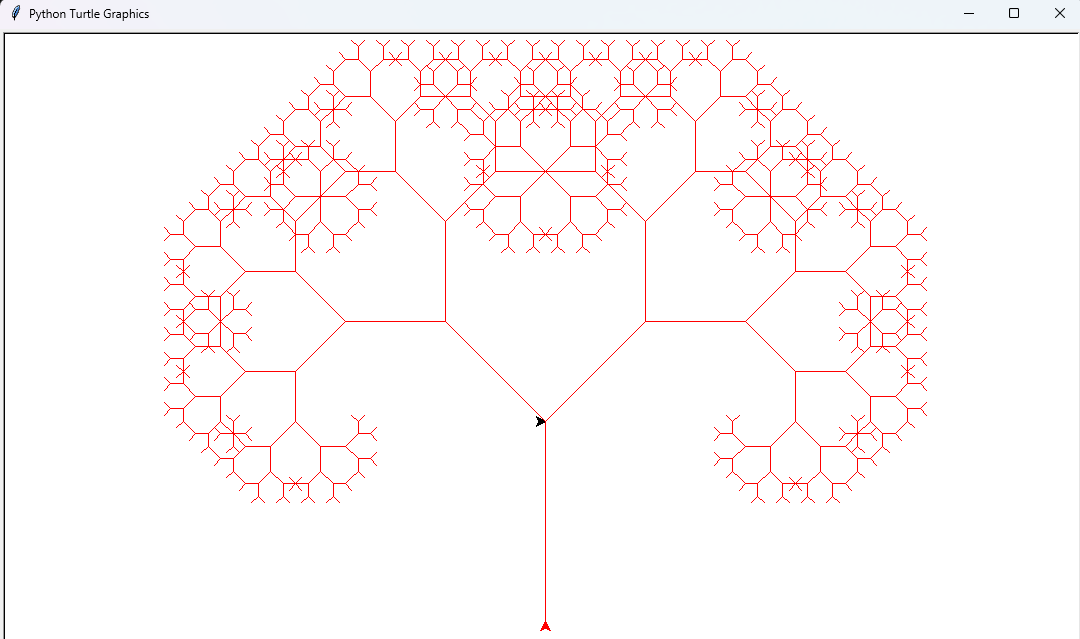

# Завдання 3. Дерева, алгоритм Дейкстри

Розробити алгоритм Дейкстри для знаходження найкоротших шляхів у зваженому графі, використовуючи бінарну купу.\
Завдання включає створення графа, використання піраміди для оптимізації вибору вершин та обчислення найкоротших шляхів від початкової вершини до всіх інших.

! Критерії прийняття:
- Програмно реалізовано алгоритм Дейкстри для знаходження найкоротшого шляху у графі з використанням бінарної купи (піраміди).
- У межах реалізації завдання створено граф, використано піраміду для оптимізації вибору вершин та виконано обчислення найкоротших шляхів від початкової вершини до всіх інших.

Найкоротші шляхи з A:
До B: ['A', 'B'] з відстанню 5
До C: ['A', 'B', 'D', 'C'] з відстанню 10
До D: ['A', 'B', 'D'] з відстанню 8
До E: ['A', 'B', 'E'] з відстанню 6


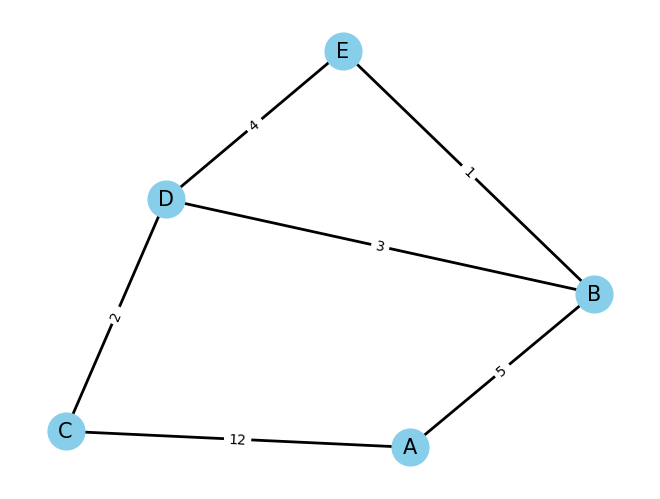

In [83]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx


def construct_shortest_path(previous_vertices, target_vertex):
    path = []
    current_vertex = target_vertex

    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = previous_vertices.get(current_vertex)

    return path[::-1]


def dijkstra(graph, start_vertex):
    distances = {vertex: float("infinity") for vertex in graph}
    previous_vertices = {vertex: None for vertex in graph}
    distances[start_vertex] = 0

    # Ініціалізація черги з пріоритетом та множини відвіданих вершин
    priority_queue = [(0, start_vertex)]
    visited_vertices = set()

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_vertex in visited_vertices:
            continue

        visited_vertices.add(current_vertex)

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_vertices


# Створення графа
G = nx.Graph()

# Приклад графа у вигляді словника
graph_data = {
    "A": {"B": 5, "C": 12},
    "B": {"A": 5, "D": 3, "E": 1},
    "C": {"A": 12, "D": 2},
    "D": {"B": 3, "C": 2, "E": 4},
    "E": {"D": 4, "B": 1},
}

# Додавання ребер до графа G у форматі (vertex1, vertex2, weight)
edges = [
    (vertex, neighbor, weight)
    for vertex, neighbors in graph_data.items()
    for neighbor, weight in neighbors.items()
]
G.add_weighted_edges_from(edges)

# Виклик функції для вершини A
start_vertex = "A"
distances, previous_vertices = dijkstra(graph_data, start_vertex)

# Відновлення та виведення найкоротших шляхів і відстаней до всіх вершин
print(f"Найкоротші шляхи з {start_vertex}:")
for target_vertex in graph_data:
    if target_vertex != start_vertex:
        path = construct_shortest_path(previous_vertices, target_vertex)
        if distances[target_vertex] == float("infinity"):
            print(f"До {target_vertex}: шлях недоступний")
        else:
            print(f"До {target_vertex}: {path} з відстанню {distances[target_vertex]}")

# Візуалізація графа
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=15, width=2
)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

# Завдання 4. Візуалізація піраміди

Наступний код виконує побудову бінарних дерев. Виконайте аналіз коду, щоб зрозуміти, як він працює.\
Використовуючи як базу цей код, побудуйте функцію, що буде візуалізувати бінарну купу.

! Критерії прийняття:
- Код виконується. Функція візуалізує бінарну купу.

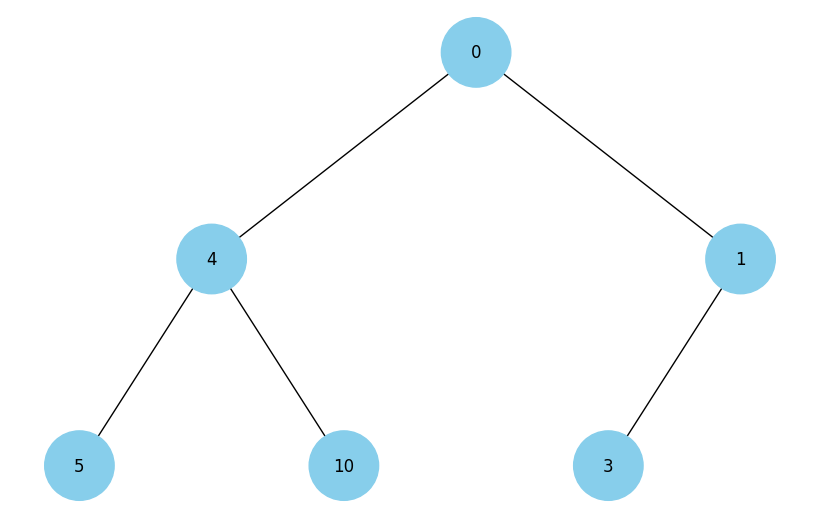

In [99]:
import uuid


class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Додатковий аргумент для зберігання кольору вузла
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(
            node.id, color=node.color, label=node.val
        )  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2**layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2**layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]["color"] for node in tree.nodes(data=True)]
    labels = {
        node[0]: node[1]["label"] for node in tree.nodes(data=True)
    }  # Використовуйте значення вузла для міток

    plt.figure(figsize=(8, 5))
    nx.draw(
        tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors
    )
    plt.show()


# Створення дерева
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Відображення дерева
draw_tree(root)

Бінарна купа у вигляді списку: [1, 5, 4, 8, 9, 6]


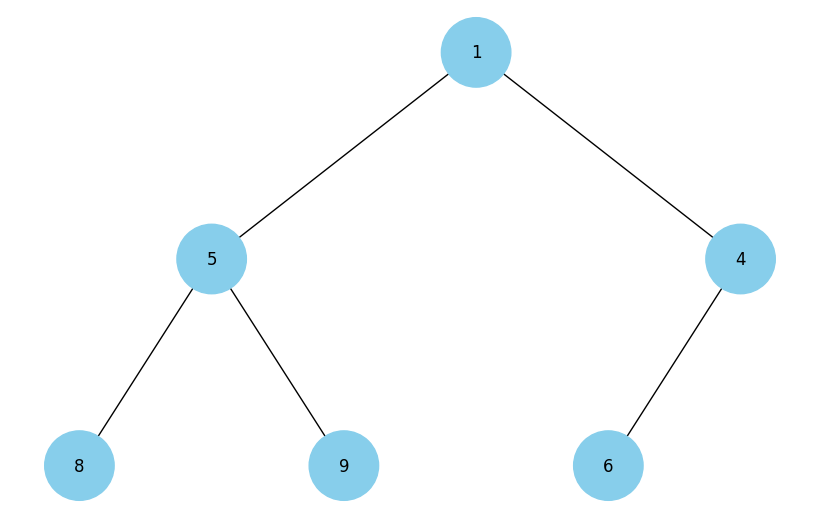

In [100]:
def build_heap_tree(heap, root=None, index=0):
    """Функція для побудови бінарного дерева з бінарної купи у вигляді списку"""
    if index < len(heap):
        root = Node(heap[index])
        root.left = build_heap_tree(heap, root.left, 2 * index + 1)
        root.right = build_heap_tree(heap, root.right, 2 * index + 2)
    return root


# Бінарна купа у вигляді списку
heap_list = [5, 8, 4, 1, 9, 6]
heapq.heapify(heap_list)
print(f"Бінарна купа у вигляді списку: {heap_list}")

# Побудова дерева з бінарної купи
heap_tree_root = build_heap_tree(heap_list)

# Візуалізація дерева бінарної купи
draw_tree(heap_tree_root)

# Завдання 5. Візуалізація обходу бінарного дерева

Використовуючи код із завдання 4 для побудови бінарного дерева, необхідно створити програму на Python, яка візуалізує обходи дерева: у глибину та в ширину.

Вона повинна відображати кожен крок у вузлах з різними кольорами, використовуючи 16-систему RGB (приклад #1296F0). Кольори вузлів мають змінюватися від темних до світлих відтінків, залежно від послідовності обходу. Кожен вузол при його відвідуванні має отримувати унікальний колір, який візуально відображає порядок обходу.

! Критерії прийняття:
- Програмно реалізовано алгоритми DFS і BFS для візуалізації обходу дерева в глибину та в ширину.
- Кольори вузлів змінюються від темних до світлих відтінків залежно від порядку обходу.

*** BFS ***


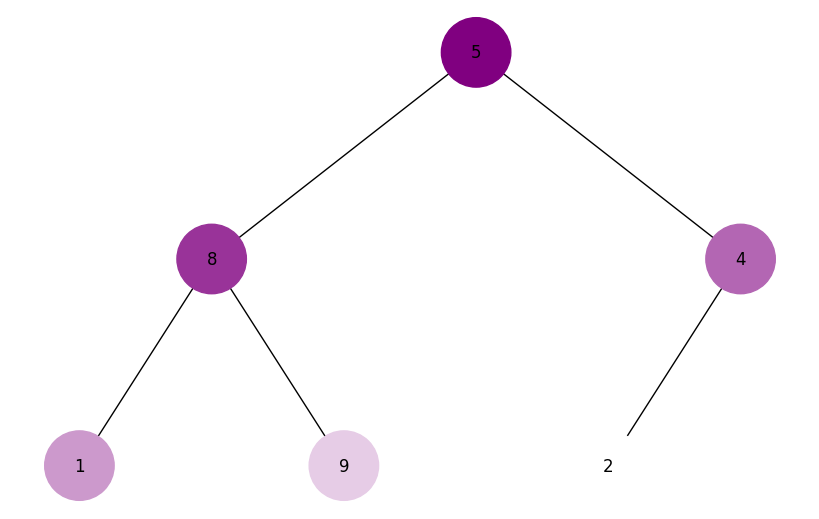

*** DFS ***


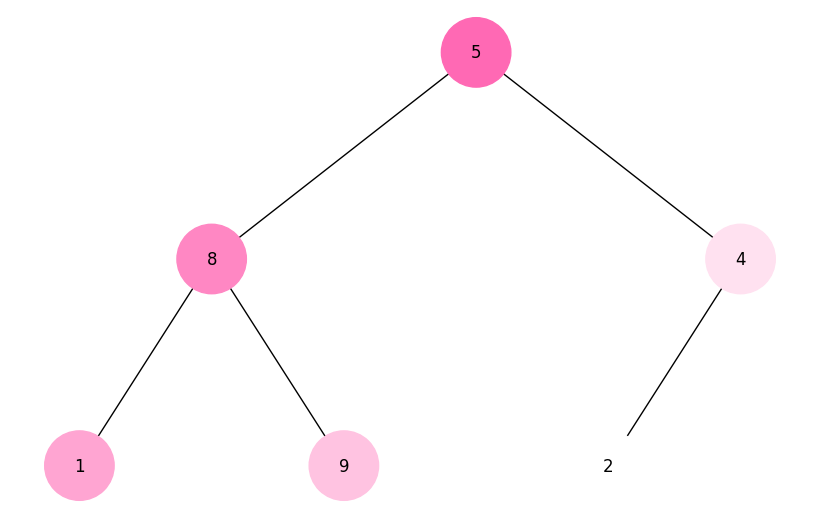

In [108]:
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def hex_color_gradient(start_hex, end_hex, steps):
    start_rgb = mcolors.hex2color(start_hex)
    end_rgb = mcolors.hex2color(end_hex)
    return [mcolors.rgb2hex(
        [start_rgb[j] + (float(i) / (steps - 1)) * (end_rgb[j] - start_rgb[j]) for j in range(3)]
    ) for i in range(steps)]

def bfs(root):
    queue = deque([root])
    visited = []
    nodes_count = 0

    # Розрахунок загальної кількості вузлів для правильного градієнту кольорів
    while queue:
        node = queue.popleft()
        if node:
            nodes_count += 1
            queue.append(node.left)
            queue.append(node.right)

    colors = hex_color_gradient("#800080", "#FFFFFF", nodes_count)
    queue = deque([root])
    color_index = 0
    while queue:
        node = queue.popleft()
        if node:
            node.color = colors[color_index]
            color_index += 1
            visited.append(node)
            queue.append(node.left)
            queue.append(node.right)
    return visited

def dfs(root):
    stack = [root]
    visited = []
    nodes_count = 0

    # Розрахунок загальної кількості вузлів для правильного градієнту кольорів
    while stack:
        node = stack.pop()
        if node:
            nodes_count += 1
            stack.append(node.right)
            stack.append(node.left)

    colors = hex_color_gradient("#FF69B4", "#FFFFFF", nodes_count)
    stack = [root]
    color_index = 0
    while stack:
        node = stack.pop()
        if node:
            node.color = colors[color_index]
            color_index += 1
            visited.append(node)
            stack.append(node.right)
            stack.append(node.left)
    return visited

# Бінарна купа у вигляді списку
heap_list = [5, 8, 4, 1, 9, 2]
heap_tree_root = build_heap_tree(heap_list)

# Візуалізація обходу в ширину (BFS)
print("*** BFS ***")
bfs(heap_tree_root)
draw_tree(heap_tree_root)

# Побудова дерева знову для обходу в глибину (DFS)
heap_tree_root = build_heap_tree(heap_list)

# Візуалізація обходу в глибину (DFS)
print("*** DFS ***")
dfs(heap_tree_root)
draw_tree(heap_tree_root)


# Завдання 6: Жадібні алгоритми та динамічне програмування

Необхідно написати програму на Python, яка використовує два підходи — жадібний алгоритм та алгоритм динамічного програмування для розв’язання задачі вибору їжі з найбільшою сумарною калорійністю в межах обмеженого бюджету.

Кожен вид їжі має вказану вартість і калорійність. Дані про їжу представлені у вигляді словника, де ключ — назва страви, а значення — це словник з вартістю та калорійністю.

In [52]:
# Дані
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350},
}

Розробіть функцію greedy_algorithm жадібного алгоритму, яка вибирає страви, максимізуючи співвідношення калорій до вартості, не перевищуючи заданий бюджет.

Для реалізації алгоритму динамічного програмування створіть функцію dynamic_programming, яка обчислює оптимальний набір страв для максимізації калорійності при заданому бюджеті.

! Критерії прийняття:
- Програмно реалізовано функцію, яка використовує принцип жадібного алгоритму.\
Код виконується і повертає назви страв, максимізуючи співвідношення калорій до вартості, не перевищуючи заданий бюджет.
- Програмно реалізовано функцію, яка використовує принцип динамічного програмування.\
Код виконується і повертає оптимальний набір страв для максимізації калорійності при заданому бюджеті.

In [56]:
def greedy_algorithm(items, budget):
    # Сортуємо страви за спаданням співвідношення калорій до вартості
    sorted_items = sorted(
        items.items(), key=lambda x: x[1]["calories"] / x[1]["cost"], reverse=True
    )
    selected_items = []
    total_cost = 0
    total_calories = 0

    for item, details in sorted_items:
        if total_cost + details["cost"] <= budget:
            selected_items.append(item)
            total_cost += details["cost"]
            total_calories += details["calories"]
    return selected_items, total_cost, total_calories


budget = 100
selection, cost, calories = greedy_algorithm(items, budget)
print(f"*** Вибір за жадібним алгоритмом ***")
print(f"Меню: {selection}")
print(f"Рахунок: ${cost}")
print(f"Калорійність: {calories} кал")

*** Вибір за жадібним алгоритмом ***
Меню: ['cola', 'potato', 'pepsi', 'hot-dog']
Рахунок: $80
Калорійність: 870 кал


In [61]:
def dynamic_programming(items, budget):
    # Створюємо таблицю dp, де dp[i][remaining_budget] — максимальні калорії для перших i страв при бюджеті remaining_budget
    dp = [[0] * (budget + 1) for _ in range(len(items) + 1)]
    item_list = list(items.items())

    for item_index in range(1, len(item_list) + 1):
        item_name, item_details = item_list[item_index - 1]
        cost = item_details["cost"]
        calories = item_details["calories"]

        for remaining_budget in range(budget + 1):
            if cost <= remaining_budget:
                dp[item_index][remaining_budget] = max(
                    dp[item_index - 1][remaining_budget],
                    dp[item_index - 1][remaining_budget - cost] + calories,
                )
            else:
                dp[item_index][remaining_budget] = dp[item_index - 1][remaining_budget]

    # Відновлення вибраних предметів
    remaining_budget = budget
    selected_items = []
    for item_index in range(len(item_list), 0, -1):
        if dp[item_index][remaining_budget] != dp[item_index - 1][remaining_budget]:
            item_name, item_details = item_list[item_index - 1]
            selected_items.append(item_name)
            remaining_budget -= item_details["cost"]

    total_calories = dp[len(item_list)][budget]
    total_cost = sum(items[item]["cost"] for item in selected_items)

    return selected_items, total_cost, total_calories


# Виклик функцій для динамічного програмування
selected_items_dp, total_cost_dp, total_calories_dp = dynamic_programming(items, budget)
print(f"*** Вибір за алгоритмом динамічного програмування ***")
print(f"Меню: {selected_items_dp}")
print(f"Рахунок: ${total_cost_dp}")
print(f"Калорійність: {total_calories_dp} кал")

*** Вибір за алгоритмом динамічного програмування ***
Меню: ['potato', 'cola', 'pepsi', 'pizza']
Рахунок: $100
Калорійність: 970 кал


Висновок:

Результати показують, що алгоритм динамічного програмування є більш ефективним у максимізації калорій при заданому бюджеті порівняно з жадібним алгоритмом. Жадібний алгоритм обирає страви на основі максимізації співвідношення калорій до вартості, що призводить до меншого загального споживання калорій (870 калорій) при витратах $80. Натомість, алгоритм динамічного програмування обирає страви, які забезпечують максимальну калорійність (970 калорій) при повному використанні бюджету в $100.

Цей результат підкреслює переваги використання алгоритму динамічного програмування для задач, де необхідно знайти оптимальне рішення з обмеженими ресурсами, адже він враховує всі можливі комбінації і забезпечує глобально оптимальне рішення. Жадібний алгоритм може бути корисним для швидких оцінок, але він не завжди гарантує оптимальний результат.

# Завдання 7: Використання методу Монте-Карло

Необхідно написати програму на Python, яка імітує велику кількість кидків кубиків, обчислює суми чисел, які випадають на кубиках, і визначає ймовірність кожної можливої суми.

Створіть симуляцію, де два кубики кидаються велику кількість разів. Для кожного кидка визначте суму чисел, які випали на обох кубиках. Підрахуйте, скільки разів кожна можлива сума (від 2 до 12) з’являється у процесі симуляції. Використовуючи ці дані, обчисліть імовірність кожної суми.

На основі проведених імітацій створіть таблицю або графік, який відображає ймовірності кожної суми, виявлені за допомогою методу Монте-Карло.

Таблиця ймовірностей сум при киданні двох кубиків виглядає наступним чином.

```markdown
| Сума  |   Імовірність  | 
|-------|----------------|
|   2   |   2.78% (1/36) |
|   3   |   5.56% (2/36) |
|   4   |   8.33% (3/36) |
|   5   |  11.11% (4/36) |
|   6   |  13.89% (5/36) |
|   7   |  16.67% (6/36) |
|   8   |  13.89% (5/36) |
|   9   |  11.11% (4/36) |
|  10   |   8.33% (3/36) |
|  11   |   5.56% (2/36) |
|  12   |   2.78% (1/36) |
```

! Критерії прийняття:

- Програмно реалізовано алгоритм для моделювання кидання двох ігрових кубиків і побудови таблиці сум та їх імовірностей за допомогою методу Монте-Карло.
- Код виконується та імітує велику кількість кидків кубиків, обчислює суми чисел, які випадають на кубиках, підраховує, скільки разів кожна можлива сума з’являється у процесі симуляції, і визначає ймовірність кожної можливої суми.
- Створено таблицю або графік, який відображає ймовірності кожної суми, виявлені за допомогою методу Монте-Карло.
- Зроблено висновки щодо правильності розрахунків шляхом порівняння отриманих за допомогою методу Монте-Карло результатів та результатів аналітичних розрахунків. Висновки оформлено у вигляді файлу readme.md фінального завдання.

    Сума  Імовірність (%)  Теоретична імовірність (%)
0      2            2.793                        2.78
1      3            5.461                        5.56
2      4            8.290                        8.33
3      5           10.999                       11.11
4      6           13.974                       13.89
5      7           16.641                       16.67
6      8           14.010                       13.89
7      9           11.099                       11.11
8     10            8.333                        8.33
9     11            5.586                        5.56
10    12            2.814                        2.78


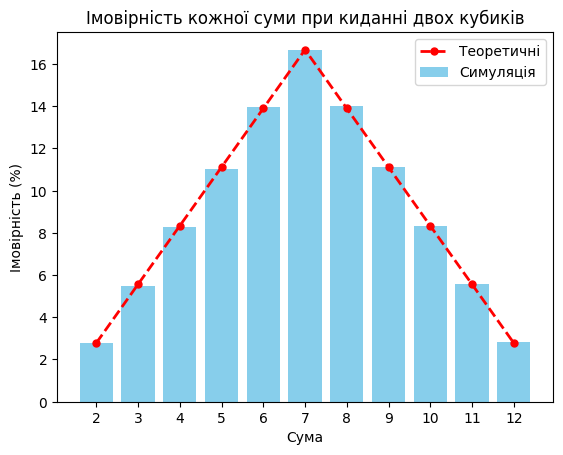

In [77]:
import random
import pandas as pd


def roll_dice(num_rolls):
    dice_sums = []
    for _ in range(num_rolls):
        dice1 = random.randint(1, 6)
        dice2 = random.randint(1, 6)
        dice_sums.append(dice1 + dice2)
    return dice_sums


def calculate_probabilities(dice_sums, num_rolls):
    simulated_probabilities = {}
    for j in range(2, 13):
        simulated_probabilities[j] = dice_sums.count(j) / num_rolls * 100
    return simulated_probabilities


def simulate_dice_rolls(num_rolls):
    sums = roll_dice(num_rolls)
    simulated_probabilities = calculate_probabilities(sums, num_rolls)
    return simulated_probabilities


def create_probability_table(simulated_probabilities, theoretical_probabilities):
    df = pd.DataFrame(
        list(simulated_probabilities.items()), columns=["Сума", "Імовірність (%)"]
    )
    df["Теоретична імовірність (%)"] = df["Сума"].apply(
        lambda x: theoretical_probabilities[x]
    )
    df = df.sort_values(by="Сума")
    return df


def plot_probabilities(simulated_probabilities, theoretical_probabilities):
    fig, ax = plt.subplots()
    ax.bar(
        simulated_probabilities.keys(),
        simulated_probabilities.values(),
        color="skyblue",
        label="Симуляція",
    )
    ax.plot(
        list(theoretical_probabilities.keys()),
        list(theoretical_probabilities.values()),
        color="red",
        marker="o",
        linestyle="dashed",
        linewidth=2,
        markersize=5,
        label="Теоретичні",
    )
    ax.set_xlabel("Сума")
    ax.set_ylabel("Імовірність (%)")
    ax.set_title("Імовірність кожної суми при киданні двох кубиків")
    ax.set_xticks(range(2, 13))
    ax.legend()
    plt.show()


# Основна частина програми
num_rolls = 100000  # Велика кількість кидків для точної симуляції

# Теоретичні ймовірності для кожної суми
theoretical_probabilities = {
    2: 2.78,
    3: 5.56,
    4: 8.33,
    5: 11.11,
    6: 13.89,
    7: 16.67,
    8: 13.89,
    9: 11.11,
    10: 8.33,
    11: 5.56,
    12: 2.78,
}

# Виконання симуляції
simulated_probabilities = simulate_dice_rolls(num_rolls)

# Створення таблиці ймовірностей
probability_table = create_probability_table(
    simulated_probabilities, theoretical_probabilities
)
print(probability_table)

# Побудова графіка ймовірностей
plot_probabilities(simulated_probabilities, theoretical_probabilities)

Висновок:

Імовірності, визначені методом Монте-Карло, були отримані в результаті проведення 100 000 симуляцій. Отримані значення є дуже близькими до теоретичних, що підтверджує правильність розрахунків. Метод Монте-Карло дозволяє отримати точні ймовірності для великих кількостей кидків кубиків. Зі збільшенням кількості симуляцій точність буде зростати згідно з правилом: щоб зменшити помилку в 10 разів (інакше кажучи, щоб отримати у відповіді ще один правильний десятковий знак), потрібно збільшити кількість випробувань у 100 разів.